# Analyse des déserts médicaux en France


<p style="text-align:justify";>L'accroissement continu de l'exode rural des médecins dans certaines régions provenciales de France est un phénonème inquiètant. D'après l'Insee, nous avions en moyenne 334 médecins pour 100 000 habitants en 2012, ce qui est au dessus du seuil appelé critique de 250 médecins pour 100 000 habitants.
Cependant, on observe une répartition inégalitaire entre et les communes et les départements. En effet, si certaines régions possèdent un grand nombre de spécialistes de la santé, ce n'est pas tojours le cas. L'attractivité des territoire est souvent une des raisons à ce déserts médical. Les médecins récemment diplômés désirent s'installer davantage dans une région dynamique comme dans une ville ou ses environs. En 2017, 20% de la population française vivait à la campagne, c'est-à-dire dans des communes de moins de 2 000 habitants. Cette proportion n'est pas négligeable. L'avancée des déserts médicaux est telle que des régions, pourtant attractives, sont elles aussi en manque de médecins. 
Le but de ce projet est d'analyser les déserts médicaux sur l'ensmeble du territoire métropolitain.</p>

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np


from IPython.display import display, clear_output
from pygal.style import LightColorizedStyle as LCS, RotateStyle as RS
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display
from IPython.core.display import HTML
from IPython.core.display import SVG 
import pygal.maps.fr


import matplotlib.pyplot as plt
from __future__ import print_function


%matplotlib nbagg


In [2]:
# Declaration des constantes
DATA_DIR = '../data/external/'
PROCESSED_DIR = '../data/processed/'
ANALYSIS_FILENAME = 'Analyse_df.csv'
CITIES_FILENAME = 'base-cc-filosofi-2015.xls'
COMMUNES_DIR = 'PS_communes.csv'

In [76]:
analyse_df = pd.read_csv(os.path.join(DATA_DIR,ANALYSIS_FILENAME),
                         sep = ',',
                        dtype = {'codecommuneetablissement' : str ,'CODGEO' : str }
                        )


In [77]:
# avoir la liste des colonnes et leur indice
list(enumerate(analyse_df.columns))

[(0, 'codecommuneetablissement'),
 (1, 'ambulance'),
 (2, 'analyse_medicale'),
 (3, 'autre'),
 (4, 'autre_specialiste'),
 (5, 'chirurgien'),
 (6, 'dentiste'),
 (7, 'generaliste'),
 (8, 'hopital'),
 (9, 'infirmiers'),
 (10, 'organe'),
 (11, 'radiologue'),
 (12, 'reeducateur_podologue'),
 (13, 'CODGEO'),
 (14, 'LIBGEO'),
 (15, 'NBMENFISC15'),
 (16, 'NBPERSMENFISC15'),
 (17, 'MED15'),
 (18, 'PIMP15'),
 (19, 'TP6015'),
 (20, 'TP60AGE115'),
 (21, 'TP60AGE215'),
 (22, 'TP60AGE315'),
 (23, 'TP60AGE415'),
 (24, 'TP60AGE515'),
 (25, 'TP60AGE615'),
 (26, 'TP60TOL115'),
 (27, 'TP60TOL215'),
 (28, 'PACT15'),
 (29, 'PTSA15'),
 (30, 'PCHO15'),
 (31, 'PBEN15'),
 (32, 'PPEN15'),
 (33, 'PPAT15'),
 (34, 'PPSOC15'),
 (35, 'PPFAM15'),
 (36, 'PPMINI15'),
 (37, 'PPLOGT15'),
 (38, 'PIMPOT15'),
 (39, 'D115'),
 (40, 'D915'),
 (41, 'RD15'),
 (42, '_merge')]

In [5]:
analyse_df

,codecommuneetablissement,ambulance,analyse_medicale,autre,autre_specialiste,chirurgien,dentiste,generaliste,hopital,infirmiers,...,PPAT15,PPSOC15,PPFAM15,PPMINI15,PPLOGT15,PIMPOT15,D115,D915,RD15,_merge
0,01001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
1,01002,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
2,01004,1.0,4.0,21.0,35.0,9.0,15.0,25.0,8.0,32.0,...,9.5,6.7,2.7,2.0,2.0,-15.8,10398.571429,33801.200000,3.250562,both
3,01005,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
4,01007,0.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0,4.0,...,8.1,4.0,2.4,0.8,0.8,-15.1,13620.666667,34606.923077,2.540766,both
5,01008,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
6,01009,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
7,01010,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
8,01011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
9,01014,1.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,5.0,...,12.8,4.7,2.4,1.2,1.1,-17.3,12562.500000,34165.600000,2.719650,both


# Quelques statistiques

Tout comme l'Insee, nous allons nous baser sur le nombre de spécialistes de la santé pour 100 000 habitants.

In [6]:
100_000 * analyse_df.generaliste.sum()/analyse_df.NBPERSMENFISC15.sum()

144.52075190279163

Le plus important de ces métiers est le médecin généraliste. On observe qu'en moyenne, ils sont 144 pour 100 000 habitants dans les régions de la métropole.

In [7]:
analyse_df.autre_specialiste.sum() 

51562.0

In [8]:
analyse_df.NBPERSMENFISC15.sum()

67108701.5

In [9]:
analyse_df.generaliste.sum()

96986.0

In [10]:
print('Pour',int(analyse_df.NBPERSMENFISC15.sum()),'habitants, nous avons:' )
for i in range(1,13):
    print( '-',analyse_df.columns[i],':', int(analyse_df[analyse_df.columns[i]].sum()))


Pour 67108701 habitants, nous avons:
- ambulance : 8685
- analyse_medicale : 6761
- autre : 75939
- autre_specialiste : 51562
- chirurgien : 7099
- dentiste : 47031
- generaliste : 96986
- hopital : 14062
- infirmiers : 131837
- organe : 438
- radiologue : 8504
- reeducateur_podologue : 132611


In [11]:
100_000 * (analyse_df.generaliste.sum() + analyse_df.infirmiers.sum())/analyse_df.NBPERSMENFISC15.sum()

340.97366643280975

<p style="text-align:justify";>Pour caractériser un désert médical, nous ne pouvons pas uniquement nous baser sur le nombre de médecins généralistes. En effet, nous devons aussi prendre en compte les infirmiers qui offrent des services équivalents aux consultations des médecins. On remarque que nous avons 340 médecins et infirmiers pour 100 000 habitants, contre 334 pour l'Insee en 2012. Nous avons donc des résultats relativements similaires.</p>

In [12]:
analyse_df['medecin_infirmier'] = analyse_df.generaliste + analyse_df.infirmiers

In [13]:
%matplotlib inline
import seaborn as sns

sns.set()

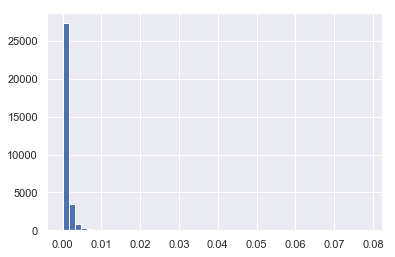

In [14]:
(analyse_df.generaliste / analyse_df.NBPERSMENFISC15).hist(bins = 50)

In [15]:
analyse_df['generaliste_habitants'] = 100_000 * analyse_df.generaliste / analyse_df.NBPERSMENFISC15
analyse_df['medecin_infirmier_habitants'] = 100_000 * analyse_df.medecin_infirmier / analyse_df.NBPERSMENFISC15

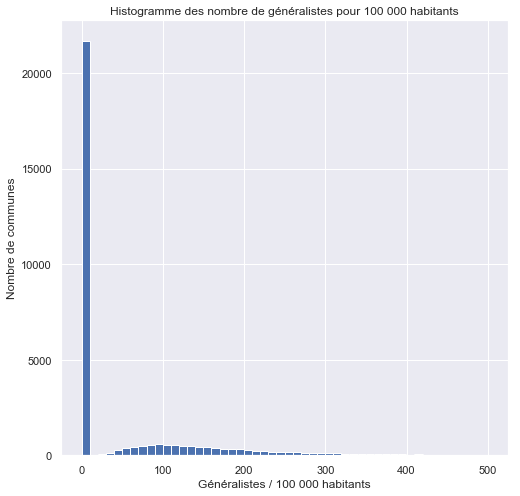

In [16]:
plt.figure(figsize=(8,8))
analyse_df.query('generaliste_habitants < 500').generaliste_habitants.hist(bins = 50)
plt.title('Histogramme des nombre de généralistes pour 100 000 habitants')
plt.xlabel('Généralistes / 100 000 habitants')
plt.ylabel('Nombre de communes');

<p style="text-align:justify";>D'après le graphique ci-dessus, nous pouvons clairement voir une répartition inégalitaire des médecins. Regardons si cela est le cas pour les infirmiers et les médecins:<:/p>

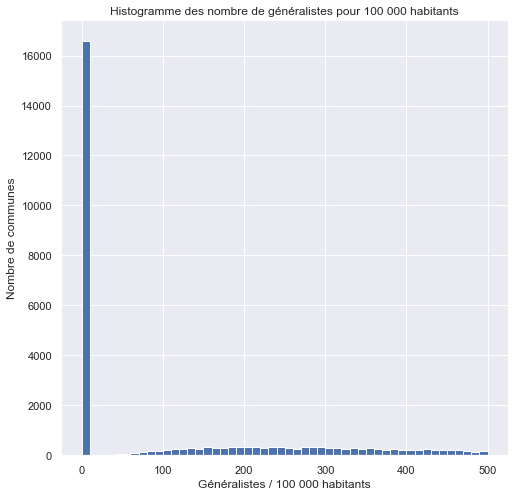

In [17]:

plt.figure(figsize=(8,8))
analyse_df.query('medecin_infirmier_habitants < 500 ').medecin_infirmier_habitants.hist(bins = 50)
plt.title('Histogramme des nombre de généralistes pour 100 000 habitants')
plt.xlabel('Généralistes / 100 000 habitants')
plt.ylabel('Nombre de communes');


<p style="text-align:justify";>Encore une fois, la répartition n'est pas égale entre les communes. Nous remarquons tout de même des valeurs proches de 0. Regardons s'il y a des observations pour lesquelles la population ou le code postal est nul.</p>

In [18]:
analyse_df.dropna(subset= ['CODGEO','NBPERSMENFISC15']).loc[analyse_df.generaliste_habitants == 0].count()

codecommuneetablissement       21672
ambulance                      21672
analyse_medicale               21672
autre                          21672
autre_specialiste              21672
chirurgien                     21672
dentiste                       21672
generaliste                    21672
hopital                        21672
infirmiers                     21672
organe                         21672
radiologue                     21672
reeducateur_podologue          21672
CODGEO                         21672
LIBGEO                         21672
NBMENFISC15                    21672
NBPERSMENFISC15                21672
MED15                          21672
PIMP15                           143
TP6015                            73
TP60AGE115                         4
TP60AGE215                         6
TP60AGE315                         8
TP60AGE415                         7
TP60AGE515                         4
TP60AGE615                         3
TP60TOL115                        13
T

## Analyse du nombre de médecins par départements

<p style="text-align:justify";>On prend les 2 premiers caractères des codes commune pour récupérer le numéro du département. Nous décidons de mener notre analyse à l'échelle du département et non des communes, afin de pouvoir visualiser clairement les disparités entre les territoires.</p>

In [19]:
analyse_df.loc[analyse_df.CODGEO.isnull()]['codecommuneetablissement'].str[:2].value_counts()

97    67
98     6
29     1
Name: codecommuneetablissement, dtype: int64

In [20]:
analyse_df.loc[(analyse_df.CODGEO.isnull()) & (analyse_df.codecommuneetablissement.str[:2] == '98')]

,codecommuneetablissement,ambulance,analyse_medicale,autre,autre_specialiste,chirurgien,dentiste,generaliste,hopital,infirmiers,...,PPMINI15,PPLOGT15,PIMPOT15,D115,D915,RD15,_merge,medecin_infirmier,generaliste_habitants,medecin_infirmier_habitants
20472,98733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,0.0,NaN,NaN
20473,98735,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,1.0,NaN,NaN
20474,98738,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,1.0,NaN,NaN
20475,98749,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,1.0,NaN,NaN
20476,98812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,0.0,NaN,NaN
20477,98818,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,5.0,NaN,NaN


In [21]:
analyse_df.columns

Index(['codecommuneetablissement', 'ambulance', 'analyse_medicale', 'autre',
       'autre_specialiste', 'chirurgien', 'dentiste', 'generaliste', 'hopital',
       'infirmiers', 'organe', 'radiologue', 'reeducateur_podologue', 'CODGEO',
       'LIBGEO', 'NBMENFISC15', 'NBPERSMENFISC15', 'MED15', 'PIMP15', 'TP6015',
       'TP60AGE115', 'TP60AGE215', 'TP60AGE315', 'TP60AGE415', 'TP60AGE515',
       'TP60AGE615', 'TP60TOL115', 'TP60TOL215', 'PACT15', 'PTSA15', 'PCHO15',
       'PBEN15', 'PPEN15', 'PPAT15', 'PPSOC15', 'PPFAM15', 'PPMINI15',
       'PPLOGT15', 'PIMPOT15', 'D115', 'D915', 'RD15', '_merge',
       'medecin_infirmier', 'generaliste_habitants',
       'medecin_infirmier_habitants'],
      dtype='object')

<p style="text-align:justify";>Avant de regrouper les communes en départements, nous devons regarder quelle variable pourrait nous intéresser. Comme la base filosi n'a pas de noms de colonne explicites, nous devons regarder dans le dictionnaire de la base les intitulés : 

- CODGEO : Code géographique ;
- LIBGEO : Libellé géographique ;
- NBMENFISC15 : Nombre de ménages fiscaux ;
- NBPERSMENFISC15 : Nombre de personnes dans les ménages fiscaux ;
- MED15 : Médiane du niveau de vie (€) ;
- PIMP15 : Part des ménages fiscaux imposés (%) ;
- TP6015 : Taux de pauvreté-Ensemble (%) ;
- PACT15 : Part des revenus d'activité (%) ;
- PPSOC15 : Part de l'ensemble des prestations sociales (%) ;
- RD15 : Rapport interdécile 9e décile/1er decile ;
- D115 : 1er décile du niveau de vie (€) ;
- D915 : 9e décile du niveau de vie (€).

Nous choisissons de garder la médiane du niveau de vie, le taux de pauvreté, la part des revenu d'activité, part de l'ensemble des prestations sociales, et les 1er et 9e déciles du niveau de vie. Nous prendrons leur valeur moyenne dans le département tandis que nous ferons la somme des spécialistes de la santé pour les métiers. </p>

In [22]:
dept = (analyse_df
           .dropna(subset = ['CODGEO','NBPERSMENFISC15'])
           .assign(dep = lambda df: df.CODGEO.str[:2])
           .groupby('dep')[['NBPERSMENFISC15','ambulance', 'analyse_medicale', 'autre',
            'autre_specialiste', 'chirurgien', 'dentiste', 'generaliste',
           'hopital', 'infirmiers', 'organe', 'radiologue',
           'reeducateur_podologue','medecin_infirmier']].sum())
dept2 = (analyse_df
           .dropna(subset = ['CODGEO','NBPERSMENFISC15'])
           .assign(dep = lambda df: df.CODGEO.str[:2])
           .groupby('dep')[['MED15','TP6015','PACT15','PPSOC15','D115','D915']].mean())
dept_df = dept.merge(dept2, on = 'dep', how= 'outer', indicator = True)

In [23]:
dept_df.head()

,NBPERSMENFISC15,ambulance,analyse_medicale,autre,autre_specialiste,chirurgien,dentiste,generaliste,hopital,infirmiers,...,radiologue,reeducateur_podologue,medecin_infirmier,MED15,TP6015,PACT15,PPSOC15,D115,D915,_merge
dep,,,,,,,,,,,,,,,,,,,,,
01,611797.0,82.0,39.0,718.0,203.0,39.0,368.0,597.0,138.0,1070.0,...,38.0,959.0,1667.0,22744.272348,11.944704,76.304054,4.039189,12675.819393,41113.240299,both
02,518914.0,65.0,36.0,238.0,263.0,25.0,261.0,567.0,119.0,986.0,...,59.0,562.0,1553.0,19781.116520,21.697749,64.508824,8.847059,9953.971671,30065.370579,both
03,332244.5,59.0,25.0,307.0,157.0,35.0,192.0,392.0,59.0,774.0,...,30.0,525.0,1166.0,19028.387523,14.745269,59.550000,5.746154,11312.194285,33188.987967,both
04,156728.5,23.0,18.0,279.0,118.0,15.0,134.0,342.0,48.0,631.0,...,6.0,419.0,973.0,19104.583738,15.416610,63.333333,5.433333,10923.188591,34477.105576,both
05,135089.5,33.0,14.0,235.0,138.0,21.0,134.0,379.0,66.0,483.0,...,25.0,596.0,862.0,19332.993996,14.502878,63.540000,5.190000,11156.589446,32654.463319,both


In [24]:
metiers = ['ambulance', 'analyse_medicale', 'autre',
       'autre_specialiste', 'chirurgien', 'dentiste', 'generaliste',
       'hopital', 'infirmiers', 'organe', 'radiologue',
       'reeducateur_podologue','medecin_infirmier']
for i in metiers : 
    dept_df[i+'_habitant'] = 100_000* dept_df[i] / dept_df.NBPERSMENFISC15

In [25]:
dept_df.to_csv("/Users/Utilisateur/Desktop/table.csv")

In [46]:
dept_df.head()

,NBPERSMENFISC15,ambulance,analyse_medicale,autre,autre_specialiste,chirurgien,dentiste,generaliste,hopital,infirmiers,...,chirurgien_habitant,dentiste_habitant,generaliste_habitant,hopital_habitant,infirmiers_habitant,organe_habitant,radiologue_habitant,reeducateur_podologue_habitant,medecin_infirmier_habitant,desert
dep,,,,,,,,,,,,,,,,,,,,,
01,611797.0,82.0,39.0,718.0,203.0,39.0,368.0,597.0,138.0,1070.0,...,6.374663,60.150671,97.581387,22.556502,174.894614,0.163453,6.211211,156.751341,272.476001,0
02,518914.0,65.0,36.0,238.0,263.0,25.0,261.0,567.0,119.0,986.0,...,4.817754,50.297352,109.266661,22.932509,190.012218,0.963551,11.369899,108.303110,299.278879,0
03,332244.5,59.0,25.0,307.0,157.0,35.0,192.0,392.0,59.0,774.0,...,10.534411,57.788767,117.985399,17.758007,232.960967,0.601966,9.029495,158.016160,350.946366,0
04,156728.5,23.0,18.0,279.0,118.0,15.0,134.0,342.0,48.0,631.0,...,9.570691,85.498170,218.211748,30.626210,402.607056,0.000000,3.828276,267.341294,620.818804,0
05,135089.5,33.0,14.0,235.0,138.0,21.0,134.0,379.0,66.0,483.0,...,15.545250,99.193498,280.554743,48.856499,357.540742,1.480500,18.506250,441.188990,638.095485,0


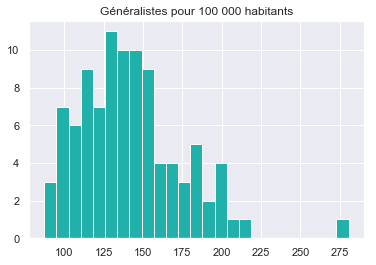

In [27]:
import matplotlib.pyplot as plt
dept_df.generaliste_habitant.hist(bins=25,color = 'lightseagreen')
plt.title('Généralistes pour 100 000 habitants');

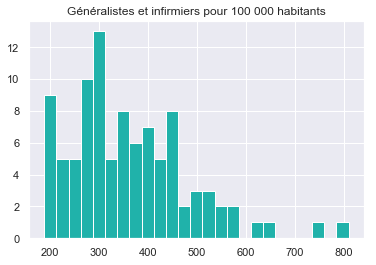

In [28]:
dept_df.medecin_infirmier_habitant.hist(bins=25,color = 'lightseagreen')
plt.title('Généralistes et infirmiers pour 100 000 habitants');

In [29]:
dept_df.medecin_infirmier_habitant.describe()

count     97.000000
mean     361.452843
std      122.609079
min      187.954707
25%      276.136507
50%      344.301812
75%      430.848385
max      808.925285
Name: medecin_infirmier_habitant, dtype: float64

**Qui a le plus de médecins ? Le moins de médecins?**

In [30]:
dept_df.sort_values(by = 'generaliste_habitant', ascending = False).tail(5)

,NBPERSMENFISC15,ambulance,analyse_medicale,autre,autre_specialiste,chirurgien,dentiste,generaliste,hopital,infirmiers,...,autre_specialiste_habitant,chirurgien_habitant,dentiste_habitant,generaliste_habitant,hopital_habitant,infirmiers_habitant,organe_habitant,radiologue_habitant,reeducateur_podologue_habitant,medecin_infirmier_habitant
dep,,,,,,,,,,,,,,,,,,,,,
72,554255.5,101.0,37.0,432.0,246.0,54.0,239.0,532.0,116.0,632.0,...,44.383863,9.742799,43.120907,95.984614,20.928976,114.026834,0.180422,8.118999,134.955810,210.011448
89,329374.0,48.0,23.0,287.0,142.0,24.0,155.0,315.0,70.0,510.0,...,43.112085,7.286550,47.058966,95.635964,21.252436,154.839180,0.910819,7.893762,134.801168,250.475144
28,429705.0,52.0,28.0,369.0,160.0,25.0,188.0,397.0,85.0,426.0,...,37.234847,5.817945,43.750945,92.388965,19.781013,99.137781,0.698153,7.214252,106.352032,191.526745
53,301157.0,55.0,12.0,214.0,91.0,13.0,136.0,277.0,75.0,406.0,...,30.216797,4.316685,45.159169,91.978603,24.903954,134.813403,0.664105,6.641054,117.878714,226.792005
27,592263.5,67.0,37.0,472.0,152.0,17.0,240.0,517.0,148.0,622.0,...,25.664252,2.870344,40.522504,87.292227,24.988877,105.020823,0.337688,5.065313,104.007760,192.313050


In [31]:
dept_df.sort_values(by = 'generaliste_habitant', ascending = False).head(5)

,NBPERSMENFISC15,ambulance,analyse_medicale,autre,autre_specialiste,chirurgien,dentiste,generaliste,hopital,infirmiers,...,autre_specialiste_habitant,chirurgien_habitant,dentiste_habitant,generaliste_habitant,hopital_habitant,infirmiers_habitant,organe_habitant,radiologue_habitant,reeducateur_podologue_habitant,medecin_infirmier_habitant
dep,,,,,,,,,,,,,,,,,,,,,
05,135089.5,33.0,14.0,235.0,138.0,21.0,134.0,379.0,66.0,483.0,...,102.154498,15.545250,99.193498,280.554743,48.856499,357.540742,1.480500,18.506250,441.188990,638.095485
04,156728.5,23.0,18.0,279.0,118.0,15.0,134.0,342.0,48.0,631.0,...,75.289434,9.570691,85.498170,218.211748,30.626210,402.607056,0.000000,3.828276,267.341294,620.818804
2A,123172.0,13.0,19.0,190.0,142.0,17.0,167.0,251.0,44.0,679.0,...,115.285942,13.801838,135.582762,203.780080,35.722404,551.261650,0.811873,20.296821,347.481570,755.041730
06,1113414.5,194.0,219.0,1807.0,1626.0,172.0,1431.0,2263.0,248.0,3587.0,...,146.037257,15.447976,128.523564,203.248655,22.273825,322.162142,0.179628,15.717417,300.067944,525.410797
34,1084819.0,153.0,176.0,1835.0,1349.0,230.0,1146.0,2196.0,212.0,3855.0,...,124.352542,21.201694,105.639743,202.430083,19.542431,355.358820,0.737450,22.676594,363.839498,557.788903


In [32]:
pd.concat([
    dept_df.sort_values(by = 'generaliste_habitant')[['NBPERSMENFISC15','generaliste_habitant']].head(5),
    dept_df.sort_values(by = 'generaliste_habitant')[['NBPERSMENFISC15','generaliste_habitant']].tail(5)
],axis = 0)

,NBPERSMENFISC15,generaliste_habitant
dep,,
27,592263.5,87.292227
53,301157.0,91.978603
28,429705.0,92.388965
89,329374.0,95.635964
72,554255.5,95.984614
34,1084819.0,202.430083
06,1113414.5,203.248655
2A,123172.0,203.780080
04,156728.5,218.211748


Les départements ayant le moins de médecins généralistes sont : 
- L'Eure;
- La Mayenne;
- L'Eur-et-Loir;
- L'Yonne;
- La Sarthe.

A l'inverse, ceux qui ont le plus de généralistes sont : 
- l'Hérault;
- Les Alpes-Maritimes;
- La Corse-du-Sud;
- Les Alpes-de-Haute-Provence;
- Les Hautes-Alpes.

On remarque que Paris ne fait pas parti du top 5 des mieux desservis. Ils correspondent tous à des départements méditerranéens.

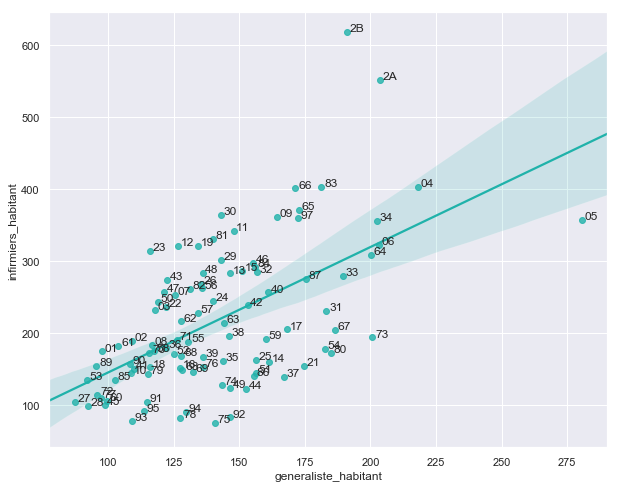

In [33]:

plt.figure(figsize = (10,8))
sns.regplot(x = 'generaliste_habitant', y ='infirmiers_habitant', color = 'lightseagreen', data = dept_df);

for i in range(dept_df.shape[0]):
    plt.text(dept_df['generaliste_habitant'].iloc[i] + 1,
             dept_df['infirmiers_habitant'].iloc[i] + 1,
             dept_df.index[i]
            )

Ce graphique confirme le lien entre les médecins et les infirmiers et justifie notre intérêt pour la combinaision de ces deux métiers. On peut aussi regarder la relation entre les généralistes et les ambulanciers.

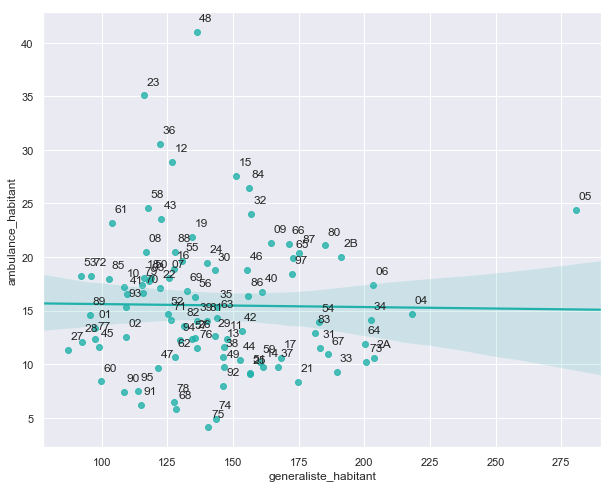

In [34]:
plt.figure(figsize = (10,8))
sns.regplot(x = 'generaliste_habitant', y ='ambulance_habitant', color = 'lightseagreen', data = dept_df);

for i in range(dept_df.shape[0]):
    plt.text(dept_df['generaliste_habitant'].iloc[i] + 1,
             dept_df['ambulance_habitant'].iloc[i] + 1,
             dept_df.index[i]
            )

Il n'y a pas de relation explicite entre les deux professions.

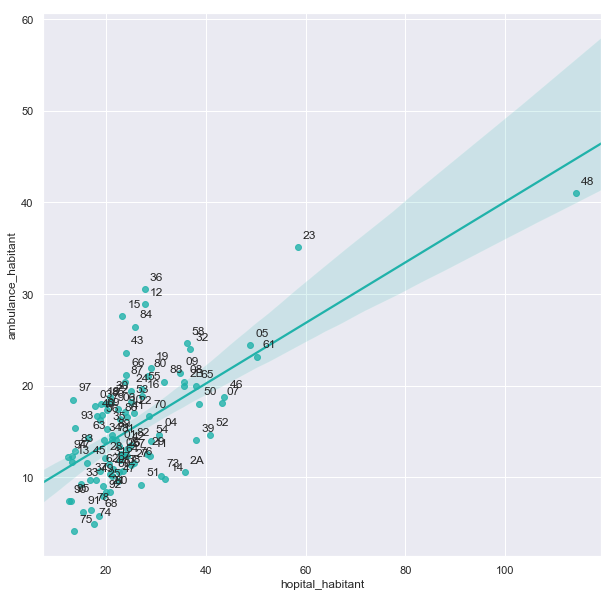

In [35]:
dept_df['hopital_habitant'] = 100_000 * dept_df.hopital / dept_df.NBPERSMENFISC15
plt.figure(figsize = (10,10))
sns.regplot(x = 'hopital_habitant', y ='ambulance_habitant', color = 'lightseagreen', data = dept_df);

for i in range(dept_df.shape[0]):
    plt.text(dept_df['hopital_habitant'].iloc[i] + 1,
             dept_df['ambulance_habitant'].iloc[i] + 1,
             dept_df.index[i]
            )

Puisque nous nous intéressons au nombre de médecins et infirmiers pour 100 000 habitants par département, nous pouvons l'illustrer graphiquement à l'aide du carte de France.

In [53]:
dictionnaire = dept_df['medecin_infirmier_habitant'].to_dict()

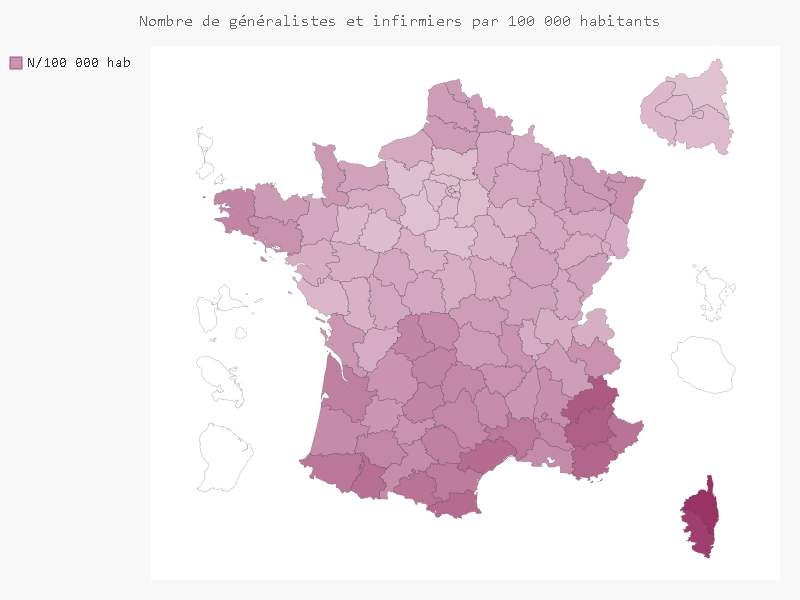

In [54]:
fr_style = RS('#993366', base_style=LCS)
fr_chart = pygal.maps.fr.Departments(human_readable = True, style = fr_style)
fr_chart.title = 'Nombre de généralistes et infirmiers par 100 000 habitants'
fr_chart.add(title = 'N/100 000 hab', values = dictionnaire)

In [55]:
html_pygal = """
<!DOCTYPEg>
<html>
  <head>
    <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
    <script type="text/javascript" src="http://kozea.github.com/pygal.js/latest/pygal-tooltips.min.js"></script>
    <!-- ... -->
  </head>
  <body>
    <figure>
    </figure>

  </body>
</html>
"""

HTML(html_pygal.format(fr_chart(human_readable = True)))

Comment caractériser un désert médical ? Trouver une démarche, une facon, un indice permettant de visualiser où est ce qu'il y a un désert médical
Faire un tableau de bord permettant de visualiser les différentes métriques : generalistes par habitants, les ambulanciers, les infirmiers.... et spécialistes = somme de tout
de facon interactif dans Dash (menu deroulant) ou ipywidget. **29 mars** Mettre tout ca sur github

## Comment caractériser un désert médical ?

Nous avons mentionné le seuil critique en 2012 de 250 spécialistes de la santé pour 100 000 habitants. Nous avons décidé de choisir ce niveau pour la classification des déserts médicaux. 
Nous allons réaliser une regression logistique afin d'analyser les impacts de variables économiques telles que le taux de pauvreté mais aussi la population ou encore le nombre d'hopitaux.
Nous devons créer une variable dichotomique valant 1 si le département est en dessous du seul critique.
$$ Y = \left\{
\begin{array}{l}
 0 \text{   si ce n'est pas un désert médical} \\
 1 \text{   si c'est pas un désert médical}
\end{array}
\right.$$



In [64]:
dept_df['desert'] = np.where(dept_df['medecin_infirmier_habitant'] <= 280,
                            1,
                            0)

In [65]:
dept_df.loc[dept_df['medecin_infirmier_habitant'] <= 280,'medecin_infirmier_habitant']

dep
01    272.476001
10    253.039656
16    279.777593
18    268.754753
27    192.313050
28    191.526745
41    260.924088
44    276.136507
45    199.618950
49    270.646014
53    226.792005
60    206.012735
68    278.218940
69    279.217666
72    210.011448
74    271.618377
75    216.704931
77    207.371653
78    210.291254
79    258.493453
85    237.933302
89    250.475144
90    266.411817
91    219.252364
92    229.652528
93    187.954707
94    220.786836
95    205.369562
Name: medecin_infirmier_habitant, dtype: float64

In [66]:
100*dept_df['desert'].value_counts()/len(dept_df)

0    71.134021
1    28.865979
Name: desert, dtype: float64

28.9% des départements seraient des déserts médicaux. </p>
**Sélection des variables :**

In [67]:
X = dept_df[['MED15', 'TP6015', 'PACT15', 
             'PPSOC15', 'D115','D915','NBPERSMENFISC15'
            ]]
y = dept_df['desert']

In [68]:
import statsmodels.formula.api as sm
 
model = sm.Logit(y,X, maxiter = 100)
 
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.415909
         Iterations 7


In [69]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                 desert   No. Observations:                   97
Model:                          Logit   Df Residuals:                       90
Method:                           MLE   Df Model:                            6
Date:                Wed, 27 Mar 2019   Pseudo R-squ.:                  0.3079
Time:                        18:58:12   Log-Likelihood:                -40.343
converged:                       True   LL-Null:                       -58.292
                                        LLR p-value:                 2.886e-06
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
MED15               0.0008      0.000      2.427      0.015       0.000       0.001
TP6015             -0.5218      0.282     -1.853      0.064      -1.074       0.030
PACT15              0.2493      

Si on se base sur le seuil de significativité de 5%, alors nous ne sommes pas dans la possibilité d'interpréter les impacts de trois variables : le taux de pauvreté, la part des prestations sociales et le nombre d'habitants. 

# Analyse des déserts médicaux avec widgets

In [70]:
occupation = ['ambulance_habitant', 'analyse_medicale_habitant', 'autre_habitant',
               'autre_specialiste_habitant', 'chirurgien_habitant', 'dentiste_habitant', 
              'generaliste_habitant','hopital_habitant', 'infirmiers_habitant',
              'organe_habitant', 'radiologue_habitant','reeducateur_podologue_habitant',
              'medecin_infirmier_habitant','desert'
             ]

clean_occup = ['Ambulanciers','Laboratoires d\'analyse', 'Autres',
            'Autres spécialistes', 'Chirurgiens', 'Dentistes',
             'Généralistes','Hopitaux, cliniques','Infirmiers',
             'Dons d\'organe','Radiologues','Rééducateurs, podologues',
               'Généralistes et infirmiers','Déserts médicaux'
             ]

dict_pro =  dict(zip(clean_occup,occupation))

Dropdown(description='Profession :', index=13, options=('Ambulanciers', "Laboratoires d'analyse", 'Autres', 'A…

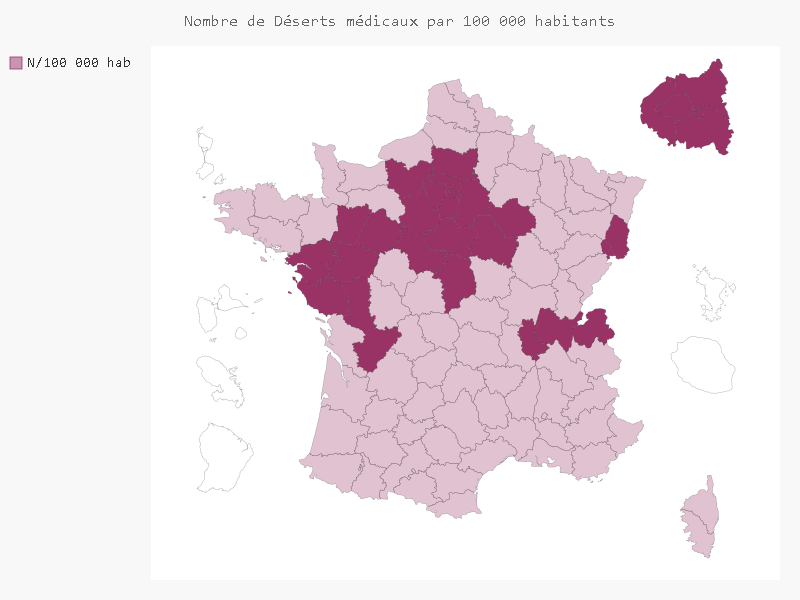

None

In [71]:


fr_style = RS('#993366', base_style=LCS)

def map_fr(liste):
    dictionnaire = dept_df[dict_pro[liste]].to_dict()
    fr_chart = pygal.maps.fr.Departments(human_readable = True, style = fr_style)
    fr_chart.title = 'Nombre de ' + liste + ' par 100 000 habitants'
    fr_chart.add(title = 'N/100 000 hab', values = dept_df[dict_pro[liste]].to_dict())
    display(fr_chart)

liste = widgets.Dropdown(
    options= clean_occup,
    value = 'Généralistes',
    description='Profession :',
    disabled=False,
)

def update_y(change):
    clear_output()
    display(liste)
    display(map_fr(liste.value))
    display(HTML(html_pygal))
    
display(liste)
display(map_fr(liste.value))
display(HTML(html_pygal))
liste.observe(update_y, names = 'value')

